# **Laboratory 3 TDSE - Exploring Convolutional Layers Through Data and Experiments**
Juan Sebastian Puentes Julio

 ##  **1. PREPARATION**

In [18]:
%pip install numpy pandas matplotlib tensorflow scikit-learn

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy


## **2. DATASET SELECTION**

The selected dataset was **fashion_mnist**

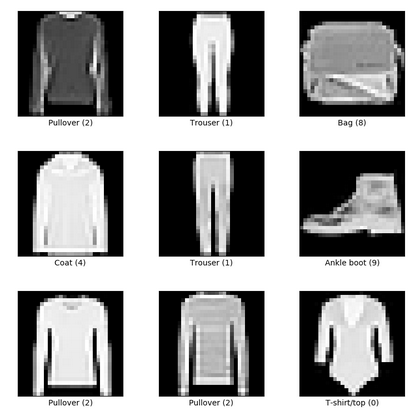

### **Dataset Size and Class Distribution**

**Dataset Size:**
- **Training Set:** 60,000 images
- **Test Set:** 10,000 images
- **Total:** 70,000 images

**Class Distribution:**

Fashion-MNIST contains **10 balanced classes** of fashion items:

| Label | Category |
|-------|----------|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



The image dimensions are **28×28 grayscale** it means (28,28,1).

The Fashion-MNIST dataset is suitable for convolutional neural networks because it contains images with clear spatial structure, local visual patterns, and intermediate complexity. These characteristics allow CNNs to effectively learn hierarchical features.


In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#TRAINING DATA
print(x_train.shape == (60000, 28, 28))
print(y_train.shape == (60000,))
#TEST DATA
print(x_test.shape == (10000, 28, 28))
print(y_test.shape == (10000,))

True
True
True
True


### **NUMBER OF OUTPUTS**

As stated earlier, we can verify that the dataset has **10** possible outputs

In [21]:
classes = np.unique(y_train)
numClasses = len(classes)

print("Classes:", classes)
print("Total number of outputs : ", numClasses)

Classes: [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


### **SAMPLES**

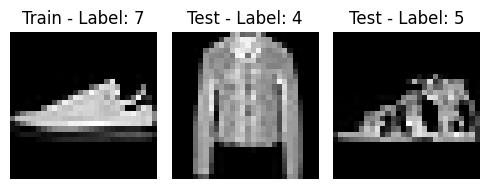

In [22]:
plt.figure(figsize=(5,5))

plt.subplot(1, 3, 1)
plt.imshow(x_train[6, :, :], cmap="gray")
plt.title("Train - Label: {}".format(y_train[6]))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(x_test[10, :, :], cmap="gray")
plt.title("Test - Label: {}".format(y_test[10]))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(x_test[11, :, :], cmap="gray")
plt.title("Test - Label: {}".format(y_test[11]))
plt.axis("off")

plt.tight_layout()
plt.show()


### **PREPROCESSING**

The input images are normalized by scaling pixel values from the range [0, 255] to [0, 1] to improve numerical stability during training.  

In [23]:
x_train = x_train.astype(np.float32) / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

x_test = x_test.astype(np.float32) / 255.0
x_test = np.reshape(x_test, (-1, 28, 28, 1))

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


## **2. BASE MODEL (NON-CONVOLUTIONAL)**

In [24]:
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train,y_train_oh,test_size=0.2,random_state=42)

In [25]:
model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

The base model is a simple, fully connected neural network. It consists of a Flatten layer that converts the 28×28 image into a one-dimensional vector, followed by a Dense layer with 128 neurons and ReLU activation. The output layer is a Dense layer with 10 neurons and Softmax activation, corresponding to the 10 classes in the dataset.

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

The model has approximately 100,000 trainable parameters, as shown in the model summary. These parameters are learned during training.

In [27]:
history = model.fit(x_train_split, y_train_split, epochs=3, batch_size=32,validation_data=(x_val, y_val))

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7758 - loss: 0.6535 - val_accuracy: 0.8285 - val_loss: 0.4761
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8582 - loss: 0.4039 - val_accuracy: 0.8631 - val_loss: 0.3742
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8715 - loss: 0.3530 - val_accuracy: 0.8713 - val_loss: 0.3546


In [28]:
loss, acc = model.evaluate(x_test, y_test_oh)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8653 - loss: 0.3772


0.8636000156402588

The model achieved a training accuracy of around 87% and a validation accuracy of around 87%, indicating that the model learns meaningful patterns but quickly reaches a performance limit.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


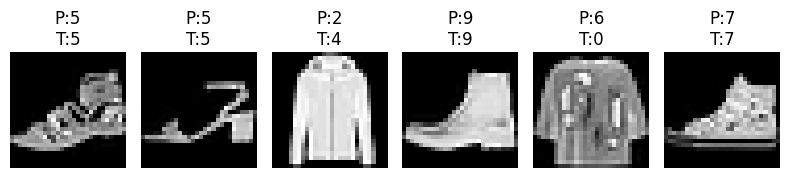

In [44]:
idx = np.random.choice(len(x_test), size=6, replace=False)

preds = model.predict(x_test[idx])

plt.figure(figsize=(8,3))
for i, j in enumerate(idx):
    plt.subplot(1, 6, i + 1)
    plt.imshow(x_test[j].squeeze(), cmap='gray')

    pred_label = np.argmax(preds[i])
    true_label = y_test[j]

    plt.title(f"P:{pred_label}\nT:{true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()



The main limitation of this baseline model is that it does not preserve the spatial structure of the images. By flattening the input, the model treats all pixels independently and cannot effectively capture local patterns such as edges or shapes. This limits its performance compared to convolutional neural networks.


## 3. **CONVOLUTIONAL ARCHITECTURE DESIGN**

In [30]:
model1 =  Sequential([

    #FIRST LAYER
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    #SECOND LAYER
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    #OUTPUT
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')

  ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Two convolutional layers were used to progressively extract visual features from the images.

The first convolutional layer uses 32 filters with a 3×3 kernel and ReLU activation. This layer focuses on learning low-level features, such as edges and simple textures.

The second convolutional layer increases the number of filters to 64. This allows the model to capture more complex patterns. A MaxPooling layer is used to prevent overfitting. After the convolutional layers, the feature maps are passed to a dense layer with 64 neurons and ReLU activation to combine the extracted features. The final dense layer uses Softmax activation to generate class probabilities for the 10 fashion categories.


In [31]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [32]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history1 = model1.fit(x_train_split, y_train_split, epochs=4, batch_size=32)

Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7399 - loss: 0.7143
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.8717 - loss: 0.3609
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8888 - loss: 0.3058
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.9040 - loss: 0.2680


In [34]:
loss1, acc1 = model1.evaluate(x_test, y_test_oh)
acc1

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8934 - loss: 0.3023


0.8931000232696533

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


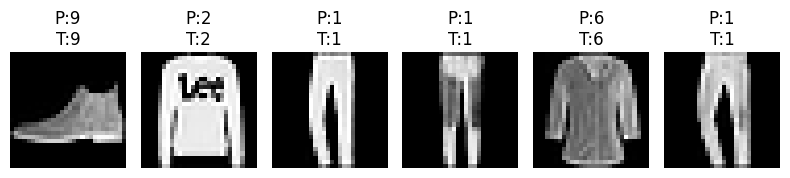

In [35]:
preds = model1.predict(x_test[:6])

plt.figure(figsize=(8,3))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')

    pred_label = np.argmax(preds[i])
    true_label = y_test[i]

    plt.title(f"P:{pred_label}\nT:{true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## **4. CONTROLLED EXPERIMENTS ON THE CONVOLUTIONAL LAYER**

Now, let's analyze the effect of kernel size on the convolutional layers. We trained the model with the same architecture and training configuration, changing the kernel size from 3×3 to 5×5. All other parameters, such as the number of filters, the optimizer, the learning rate, the batch size, and the number of epochs, remained unchanged.

In [36]:
model5x5 =  Sequential([

    #FIRST LAYER
    Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    #SECOND LAYER
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D((2,2)),

    #OUTPUT
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')

  ])

In [37]:
model5x5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model5x5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,346 (462.29 KB)

 Trainable params: 118,346 (462.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history5x5 = model5x5.fit(x_train_split, y_train_split, epochs=4, batch_size=32)

Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7481 - loss: 0.6944
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8765 - loss: 0.3396
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8976 - loss: 0.2834
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9093 - loss: 0.2457


In [40]:
loss5x5, acc5x5 = model5x5.evaluate(x_test, y_test_oh)
acc5x5

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8963 - loss: 0.3009


0.8978000283241272

### **CONCLUSIONS**

- Both models converged successfully, but the 3×3 kernel showed slightly better performance in terms of accuracy and training time.

- Using larger kernels increases the number of parameters and computational cost without a performance improvement. Using a 3x3 kernel maintains a balance between complexity and time.

## **5. INTERPRETATION AND ARCHITECTURAL REASONING**


**Why did convolutional layers outperform (or not) the baseline?**
  - Convolutional layers outperform the base model because they preserve the spatial structure of images. Unlike the fully connected base model, these models learn patterns, such as edge and texture recognition, which are important for image processing. By not flattening the image initially, the network understands that every pixel is related.

**What inductive bias does convolution introduce?**
  - Convolution introduces an inductive bias based on locality and weight distribution. The model assumes that nearby pixels are related and that the same visual patterns can appear in different parts of the image, allowing the model to learn more efficiently.

**In what type of problems would convolution not be appropriate?**
  - They are not appropriate for problems where there is no significant spatial relationship, such as tabular data or datasets. On the other hand, if the dataset is very small, the model will tend to memorize rather than generalize. In such cases, fully connected networks or other architectures are more appropriate.


## **6. SAGEMAKER DEPLOY**

In [ ]:
import os
import tensorflow as tf

export_version = '1'
export_path = os.path.join('model_export', export_version)
code_path = os.path.join('model_export', 'code')

os.makedirs(export_path, exist_ok=True)
os.makedirs(code_path, exist_ok=True)

model_scratch.save(export_path)
print(export_path)

In [ ]:
import tarfile

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=".")

make_tarfile("model.tar.gz", "model_export")
print("Archivo 'model.tar.gz' creado y listo para subir a S3.")

In [ ]:
import sagemaker

try:
    sagemaker_session = sagemaker.Session()
    bucket = sagemaker_session.default_bucket()
    prefix = 'cifar10-model'

    model_artifact = sagemaker_session.upload_data(path='model.tar.gz', bucket=bucket, key_prefix=prefix)
    print(model_artifact)
except Exception as e:
    print(f"No se pudo subir automáticamente a S3: {e}")
